In [1]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from sklearn.mixture import GaussianMixture as GMM
from sklearn.datasets import make_blobs
import random


In [2]:
import sklearn
import scipy, itertools

def L2_of_gmms(gmm1,gmm2):

  firstterm = np.sum([ai*aj*scipy.stats.multivariate_normal.pdf(meani-meanj,cov = covi+covj) for (ai,meani,covi),(aj,meanj,covj) in itertools.product(zip(gmm1.weights_,gmm1.means_,gmm1.covariances_),zip(gmm1.weights_,gmm1.means_,gmm1.covariances_))])
  secondterm = np.sum([ai*aj*scipy.stats.multivariate_normal.pdf(meani-meanj,cov = covi+covj) for (ai,meani,covi),(aj,meanj,covj) in itertools.product(zip(gmm2.weights_,gmm2.means_,gmm2.covariances_),zip(gmm2.weights_,gmm2.means_,gmm2.covariances_))])
  thirdterm = np.sum([ai*aj*scipy.stats.multivariate_normal.pdf(meani-meanj,cov = covi+covj) for (ai,meani,covi),(aj,meanj,covj) in itertools.product(zip(gmm1.weights_,gmm1.means_,gmm1.covariances_),zip(gmm2.weights_,gmm2.means_,gmm2.covariances_))])

  return firstterm+secondterm-2*thirdterm

0


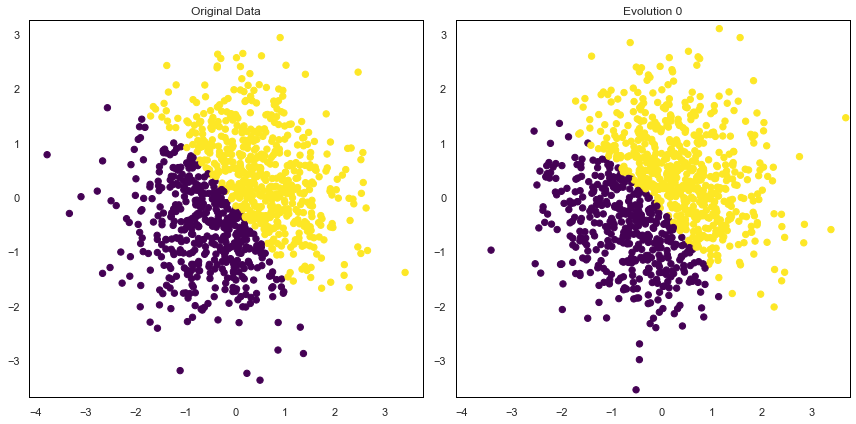

50


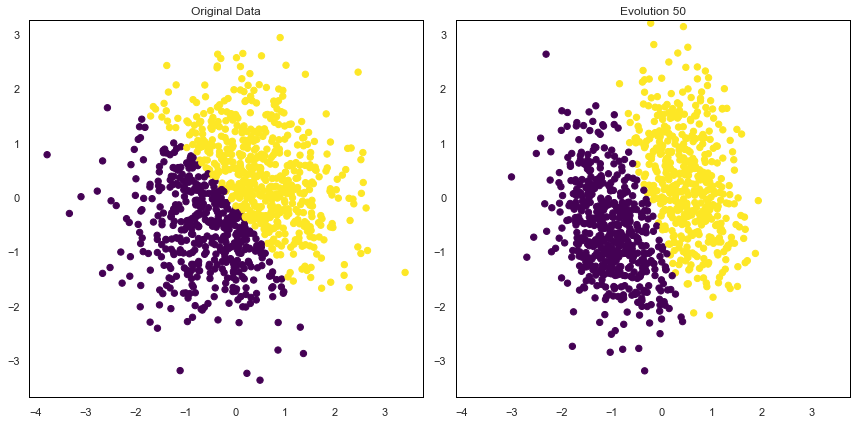

100


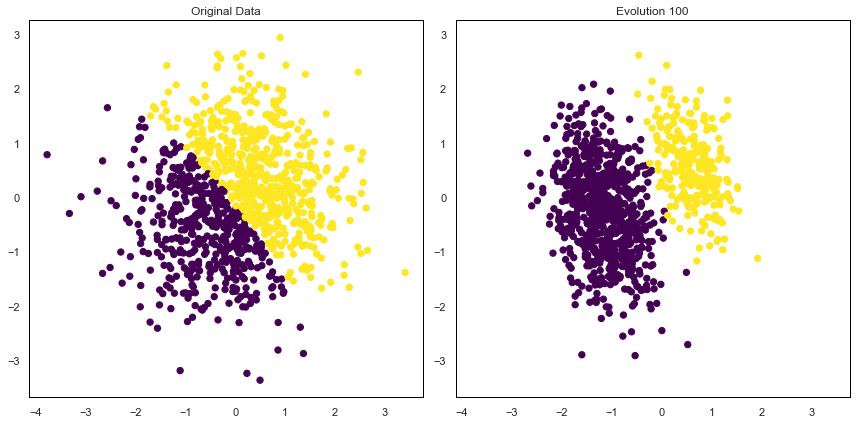

150


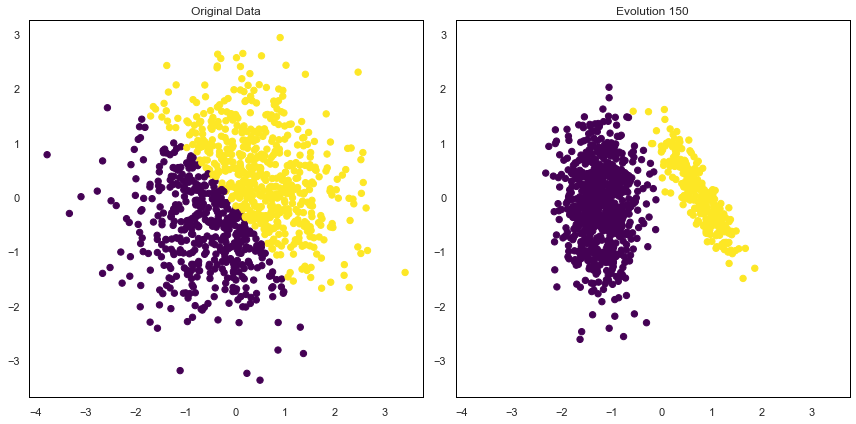

200


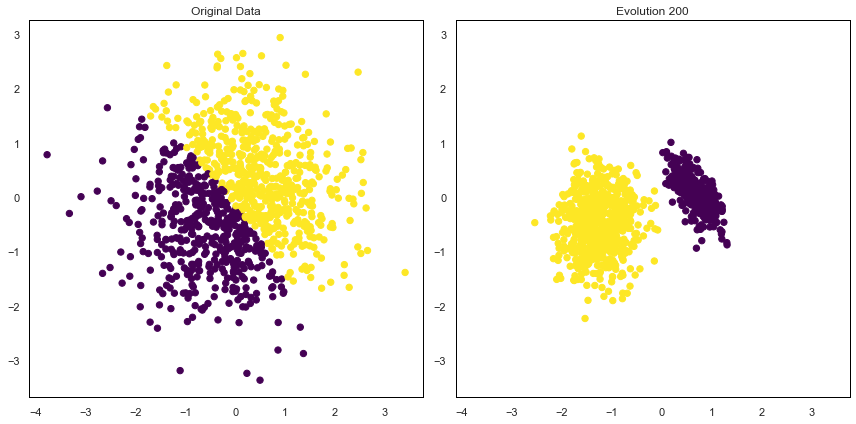

250


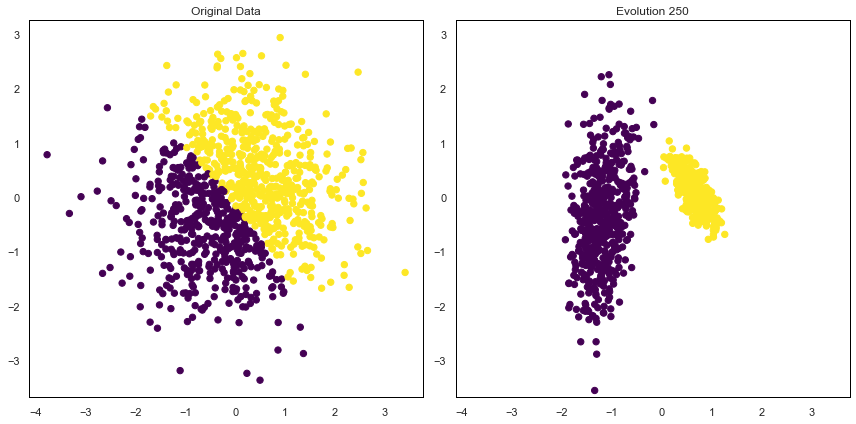

In [ ]:
mms = []
ssds = []
vars = [1,]
ncomponents = 2

gmmparams = {"n_components": ncomponents, "tol": 1e-5, "covariance_type": "full", "max_iter": 2000}

scatters = []
l2s=[]
ns = [1000]

for var in vars:
  for N in ns:

    # ncomponents
    X, y_true = make_blobs(n_samples=N, n_features=1, centers=[[0,0]], cluster_std=var)
    X0_orig = X[:, ::-1] # flip axes for better plotting
    X_0_gmm=GMM(**gmmparams).fit(X0_orig)
    labels_orig = X_0_gmm.predict(X0_orig)

    X0 = X0_orig[:]
    X = X0[:]


    means = [(X_0_gmm.means_[:].flatten())]
    if gmmparams["covariance_type"]!="diag":
      stds = [([ np.sqrt(  np.trace(X_0_gmm.covariances_[i])/ncomponents) for i in range(0,ncomponents) ])]
    else:
      stds = [X_0_gmm.covariances_]

    evolutions = 450
    for m in range(evolutions):
      gmm = GMM(**gmmparams).fit(X)

      # toadd = random.sample(X0.tolist(), int(len(X0)*1.))
      # X0 = np.vstack([toadd, X0])
      X = gmm.sample(N)[0]
      # X = np.vstack([toadd, X])
      l2s.append(L2_of_gmms(X_0_gmm,gmm))
      means.append((gmm.means_[:].flatten()))
      if gmmparams["covariance_type"]!="diag":
        stds.append(([ np.sqrt(  np.trace(gmm.covariances_[i])/ncomponents) for i in range(0,ncomponents) ]))
      else:
        stds.append(gmm.covariances_)

      if m in [0, 50, 100, 150, 200, 250, 350]:
        print(m)
        fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))  # Adjust figure size

        # Plot for the first image
        scatter1 = ax[0].scatter(
            X0_orig[:, 0], 
            X0_orig[:, 1], 
            c=labels_orig, 
            s=40, 
            cmap='viridis'
        )
        ax[0].set_facecolor('none')  # Transparent background
        ax[0].set_title("Original Data")  # Add a title

        # Customize border (spines)
        for spine in ax[0].spines.values():
            spine.set_edgecolor('black')  # Set border color
            spine.set_linewidth(1)  # Set border thickness

        # Add legend to the first plot with a border
        # legend1 = ax[0].legend(
        #     handles=[
        #         plt.Line2D([], [], marker='o', color='w', markerfacecolor='purple', markersize=10, label='Original Data'),
        #     ],
        #     loc='upper right',
        #     frameon=True,  # Enable legend box
        #     edgecolor='black',  # Border color for legend
        #     fontsize=10
        # )
        # legend1.get_frame().set_linewidth(1)  # Border thickness for legend

        # Plot for the second image
        test = X
        labels = gmm.predict(test)
        scatter2 = ax[1].scatter(
            test[:, 0], 
            test[:, 1], 
            c=labels, 
            s=40, 
            cmap='viridis'
        )
        ax[1].set_ylim(ax[0].get_ylim())  # Match limits with the first plot
        ax[1].set_xlim(ax[0].get_xlim())  # Match limits with the first plot
        ax[1].set_facecolor('none')  # Transparent background
        ax[1].set_title(f"Evolution {m}")  # Add a title


        for spine in ax[1].spines.values():
            spine.set_edgecolor('black')  # Set border color
            spine.set_linewidth(1)  # Set border thickness

        # Add legend to the second plot with a border
        # legend2 = ax[1].legend(
        #     handles=[
        #         plt.Line2D([], [], marker='o', color='w', markerfacecolor='yellow', markersize=10, label='Generated Data'),
        #     ],
        #     loc='upper right',
        #     frameon=True,  # Enable legend box
        #     edgecolor='black',  # Border color for legend
        #     fontsize=10
        # )
        # legend2.get_frame().set_linewidth(1)  # Border thickness for legend

        # Set transparent background for the figure
        fig.patch.set_alpha(0)  # Makes the figure's background transparent

        # Display plots
        plt.tight_layout()
        plt.show()
    print()

    mms.append(means)
    ssds.append(stds)

    # labels = gmm.predict(X)
    # ax[1].scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis')

    plt.figure()
    plt.plot([x[0] for x in means])